# 基础图表

## 读取数据

In [1]:
import pandas as pd

data = pd.read_csv('海康威视_clean_MaxMin.csv')
data = data[-200:]
data

,date,open,close,high,low,volume,code,5日均线,10日均线,涨幅,跌幅,RSI,MACD,MACD_Signal,MACD_Histogram,mixumum,minumum
2910,2022-08-09,31.73,31.96,32.07,31.55,337623.0,2415,31.258,31.244,0.072123,-0.072123,50.288567,-0.492308,-0.669070,0.176762,False,False
2911,2022-08-10,31.96,32.09,32.30,31.46,391723.0,2415,31.642,31.255,0.063639,-0.063639,51.325651,-0.400248,-0.615306,0.215058,False,False
2912,2022-08-11,32.29,32.63,32.90,32.26,504344.0,2415,32.062,31.315,0.068785,-0.068785,55.480391,-0.280482,-0.548341,0.267859,False,False
2913,2022-08-12,32.64,32.71,32.96,32.16,518736.0,2415,32.244,31.462,0.028616,-0.028616,56.078530,-0.177071,-0.474087,0.297016,True,False
2914,2022-08-15,32.09,31.10,32.09,30.39,1623248.0,2415,32.098,31.463,-0.022934,0.022934,43.431792,-0.222465,-0.423763,0.201297,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,2023-05-31,35.17,34.86,35.48,34.60,257120.0,2415,34.882,35.342,-0.031667,0.031667,41.617989,-1.021249,-1.175628,0.154379,False,False
3106,2023-06-01,34.89,35.90,36.40,34.44,507622.0,2415,35.072,35.449,0.027182,-0.027182,47.594390,-0.897751,-1.120053,0.222302,False,False
3107,2023-06-02,35.90,35.91,36.08,35.48,296013.0,2415,35.166,35.478,0.013262,-0.013262,47.649882,-0.789964,-1.054035,0.264071,False,False
3108,2023-06-05,35.92,36.00,36.58,35.61,341780.0,2415,35.566,35.490,0.058824,-0.058824,48.181699,-0.689334,-0.981095,0.291761,False,False


## 均线

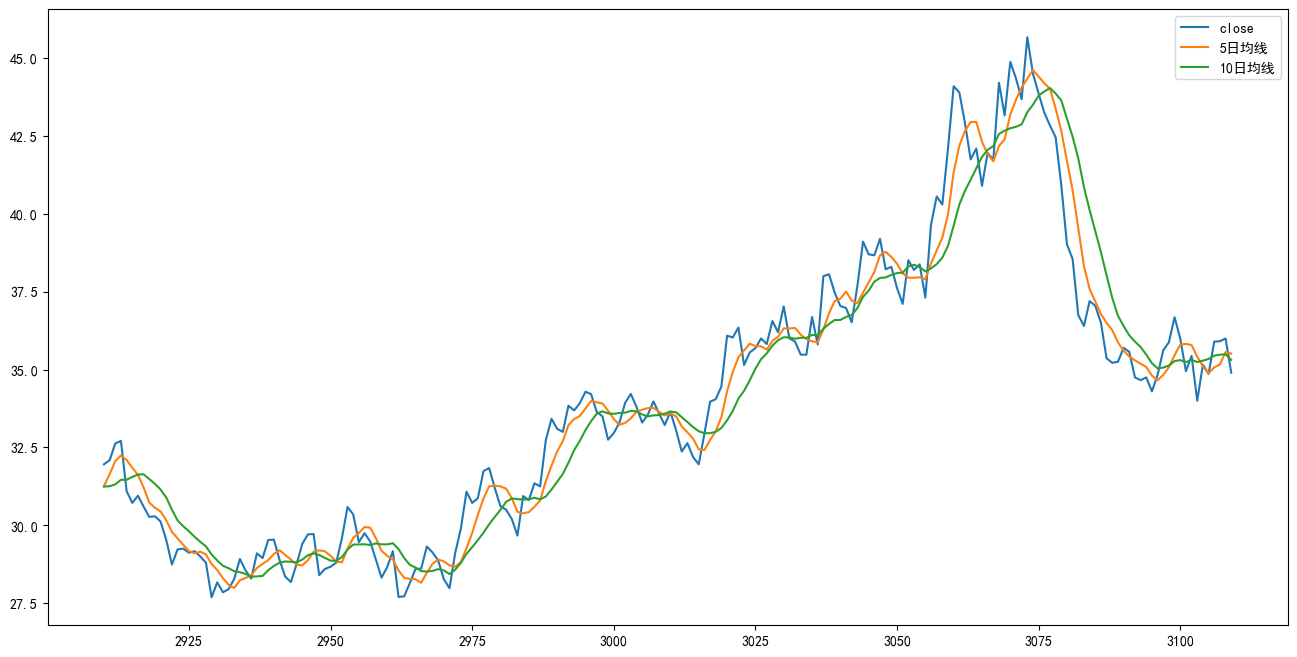

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'  # 指定中文字体，如宋体或黑体
plt.figure(figsize=(16,8))
data['close'].plot(legend=True)
data['5日均线'].plot(legend=True)
data['10日均线'].plot(legend=True)
plt.savefig("../Visualization/股票数据可视化图表/-200close-均线图.png")

## 交易量

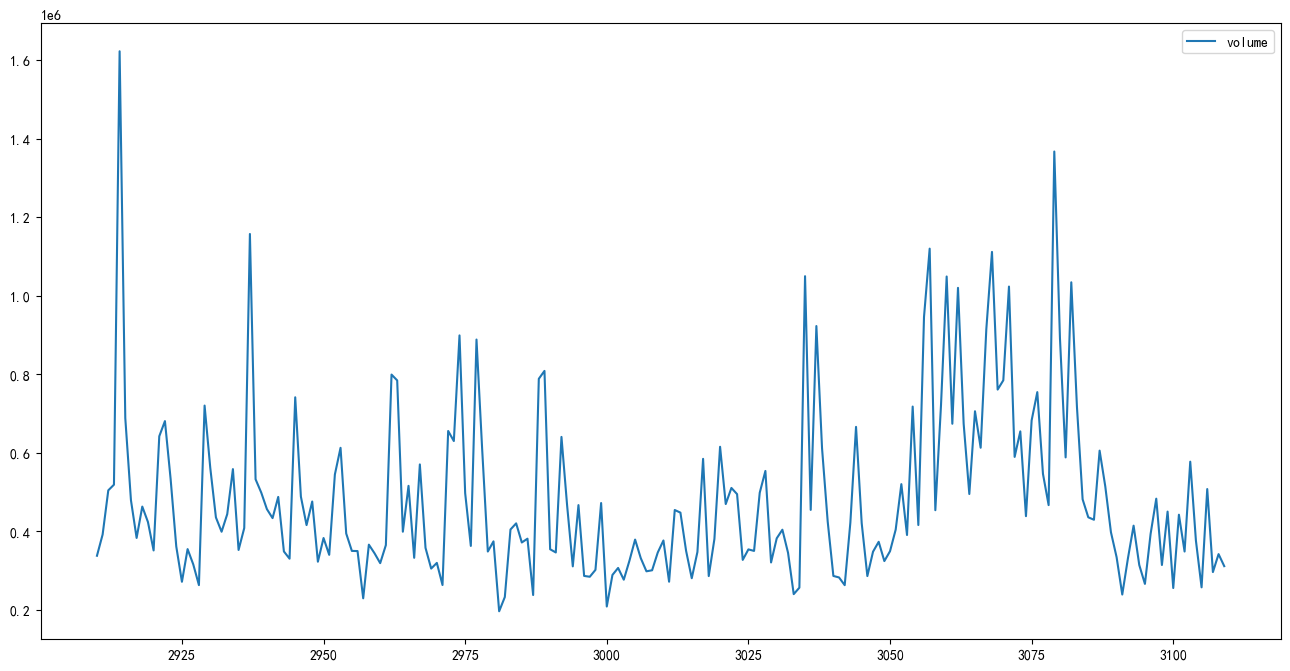

In [3]:
plt.figure(figsize=(16,8))
data['volume'].plot(legend=True)  # 交易量与股价走势 相关性
plt.savefig("../Visualization/股票数据可视化图表/-200交易量.png")

## 涨幅

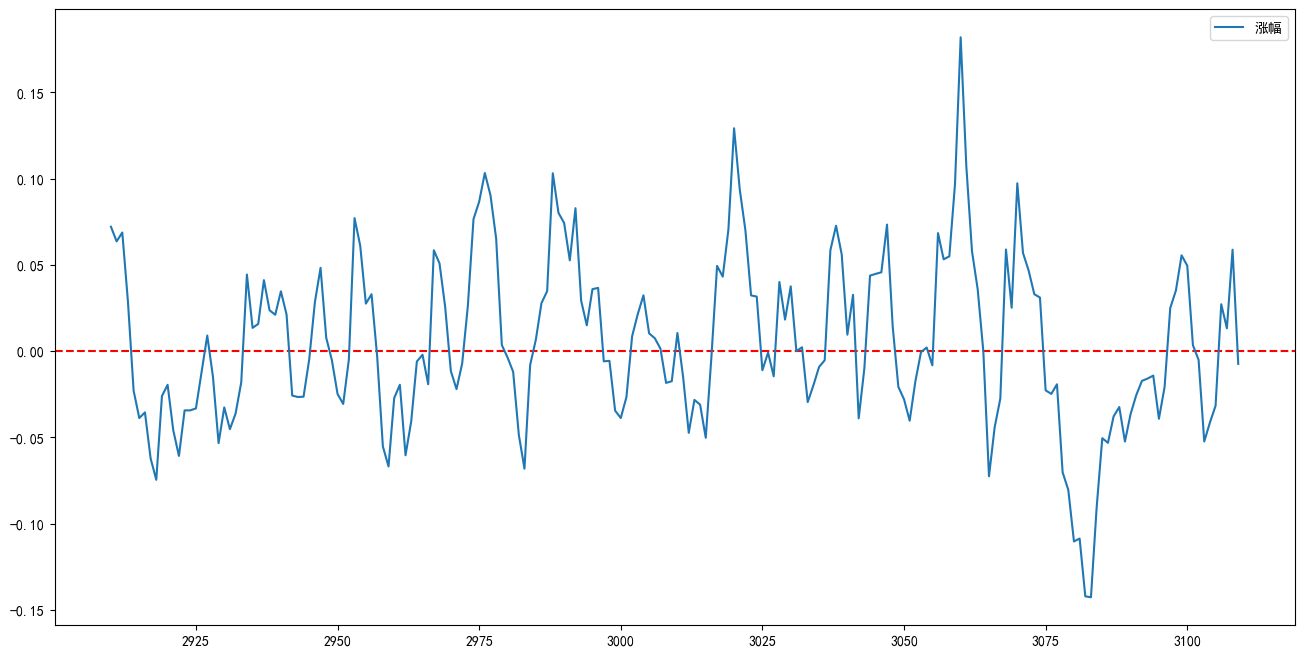

In [4]:
import numpy as np
plt.figure(figsize=(16,8))
# 添加0基准线
plt.axhline(0, color='red', linestyle='--')
data['涨幅'].plot(legend=True)  # 交易量与股价走势 相关性
plt.rcParams['axes.unicode_minus'] = False
plt.savefig("../Visualization/股票数据可视化图表/-200涨幅.png")

## RSI

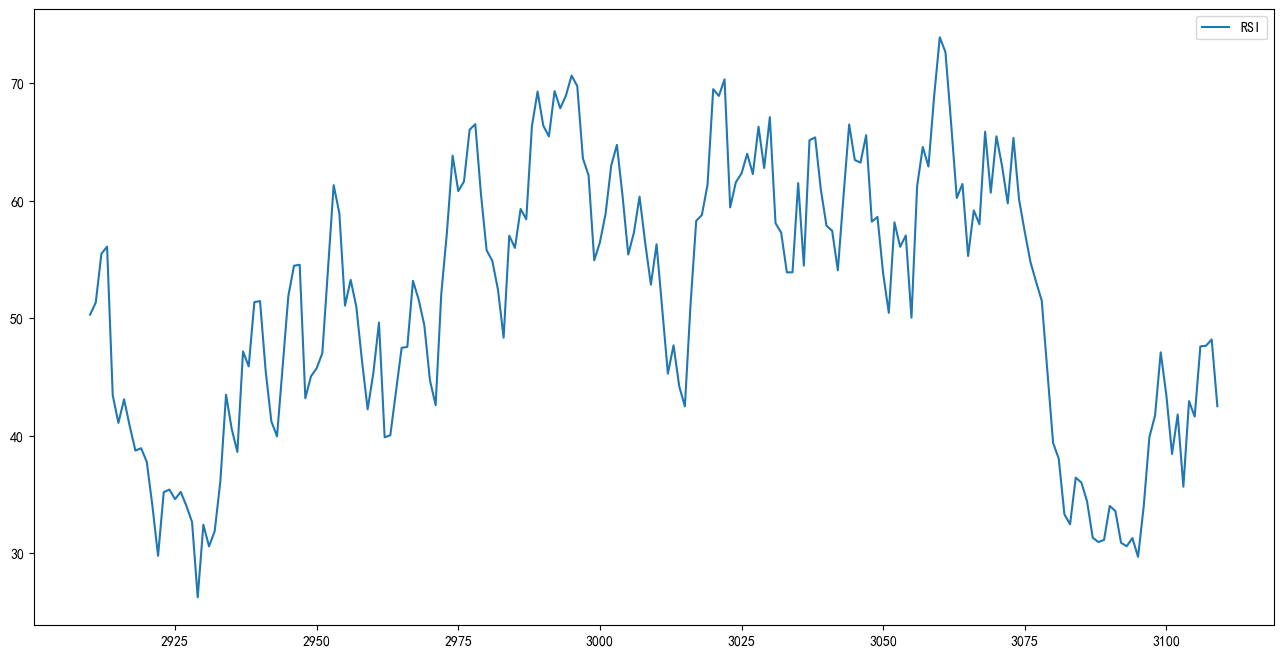

In [5]:
# import talib 
# 假设您已经有了一个名为df的DataFrame对象，其中包含日期（在df.index中）和收盘价（在df['close']中）
# 计算RSI指标  相对强弱指标  
# RSI指标基本原理： 
# 通过测量一段时间间内股价上涨总幅度占股价变化总幅度平均值的百分比来评估多空力量的强弱程度， 其能够反映出市场在一定时期内的景气程度
plt.figure(figsize=(16,8))
data['RSI'].plot(legend=True)
plt.savefig("../Visualization/股票数据可视化图表/-200RSI.png")

## MACD、macdsignal、macdhist
MACD线、信号线（signal line,MACD线的9日指数移动均线）、离差图（divergence histogram）
macd（对应diff）
macdsignal（对应dea）
macdhist（对应macd）

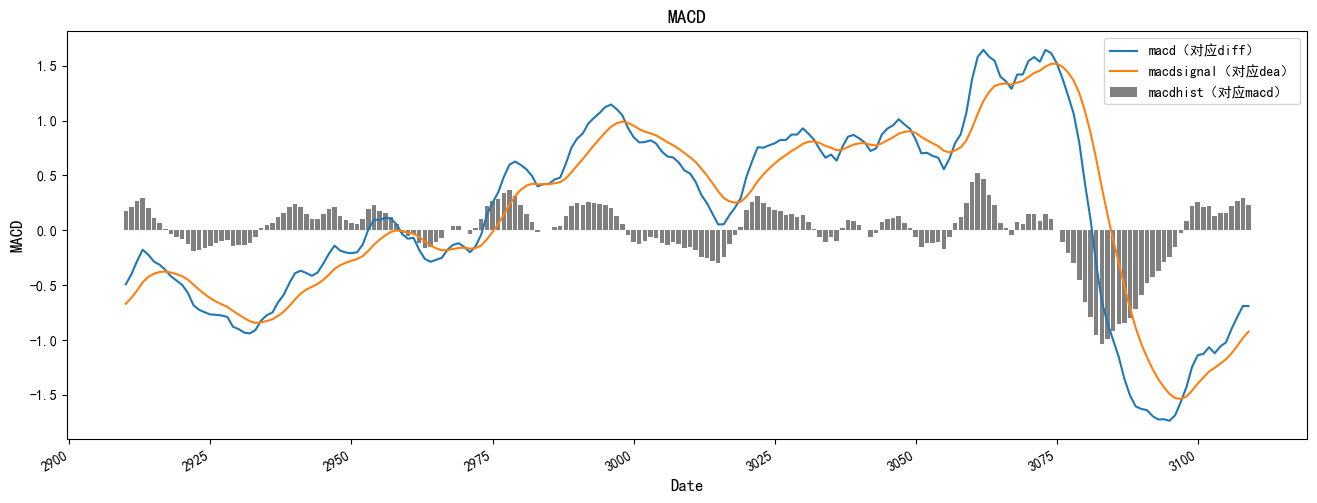

In [6]:
# MACD指标
df = data
# 创建图形对象和子图对象
fig, ax = plt.subplots(figsize=(16, 6))

# 绘制MACD线
ax.plot(df.index, data['MACD'], label='macd（对应diff）')
# 绘制信号线
ax.plot(df.index, data['MACD_Signal'], label='macdsignal（对应dea）')
# 绘制柱状图
ax.bar(df.index, data['MACD_Histogram'], label='macdhist（对应macd）', color='gray')

# 设置图表标题和轴标签
ax.set_title('MACD', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('MACD', fontsize=12)

# 设置图例
ax.legend()

# 自动调整日期显示格式
fig.autofmt_xdate()

# 显示图表
plt.show()
# 然后按照下面的原则判断买入还是卖出。       
# 1.DIFF、DEA均为正，DIFF向上突破DEA，买入信号。       
# 2.DIFF、DEA均为负，DIFF向下跌破DEA，卖出信号。       
# 3.DEA线与K线发生背离，行情反转信号。       
# 4.分析MACD柱状线，由正变负，卖出信号；由负变正，买入信号。

# 特征预测

## close预测

Epoch 1/50
25/25 [==============================] - 4s 9ms/step - loss: 0.0431
Epoch 2/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 3/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 4/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 7/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 8/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 9/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 10/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 11/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 12/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 13/50
25/25 [==============================

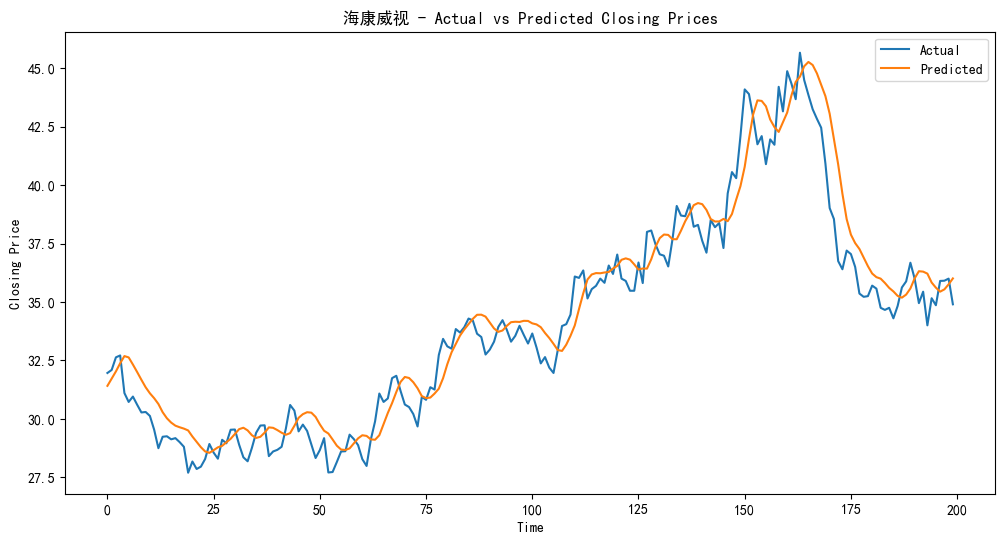

均方误差 (MSE):  1.414976907624806
均方根误差 (RMSE):  1.1895280188481505


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1000:]  # 假设数据存储在名为google_stock_data.csv的文件中

# 提取收盘价列
close_prices = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i - window_size:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_data[len(scaled_data) - len(test_data) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i, 0])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_data)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('海康威视 - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
# 预测效果滞后（每一步都在亏损）

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## MACD预测

Epoch 1/50
50/50 [==============================] - 4s 9ms/step - loss: 0.0688
Epoch 2/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0562
Epoch 3/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0559
Epoch 4/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0557
Epoch 5/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0554
Epoch 6/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0555
Epoch 7/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0543
Epoch 8/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0522
Epoch 9/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0504
Epoch 10/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0496
Epoch 11/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0502
Epoch 12/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0499
Epoch 13/50
50/50 [==============================

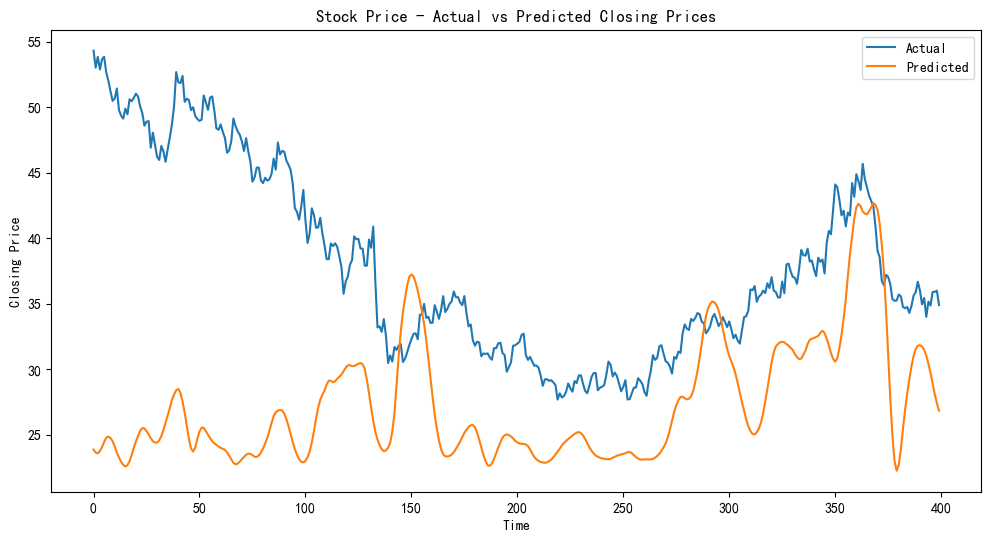

均方误差 (MSE):  181.9653918285213
均方根误差 (RMSE):  13.489454838077085


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-2000:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['MACD']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## MACD_Signal

Epoch 1/50
38/38 [==============================] - 4s 9ms/step - loss: 0.0793
Epoch 2/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0540
Epoch 3/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0530
Epoch 4/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0529
Epoch 5/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0527
Epoch 6/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0529
Epoch 7/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0529
Epoch 8/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0525
Epoch 9/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0528
Epoch 10/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0523
Epoch 11/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0520
Epoch 12/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0538
Epoch 13/50
38/38 [==============================

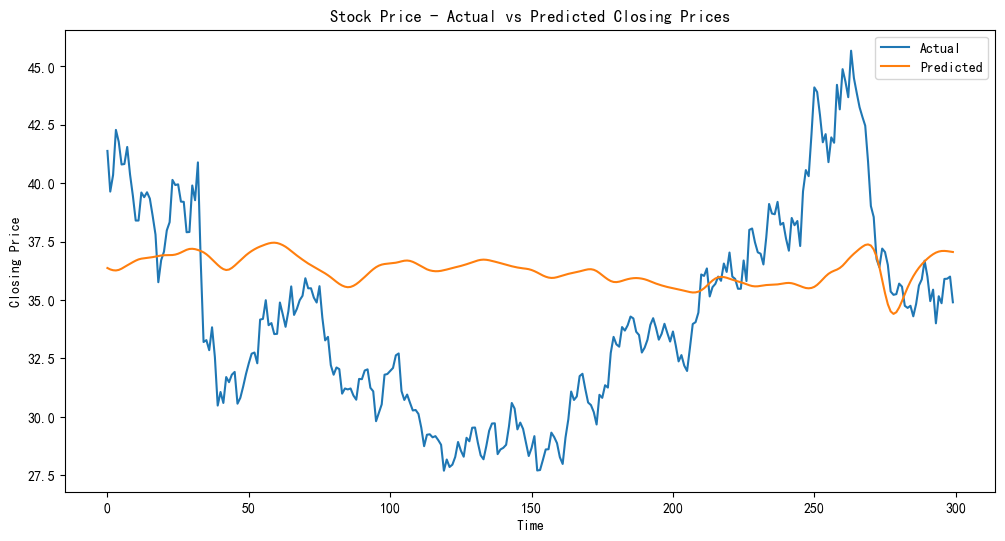

均方误差 (MSE):  21.6339851221232
均方根误差 (RMSE):  4.651234795419728


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1500:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['MACD_Signal']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## *MACD_Histogram

Epoch 1/50
38/38 [==============================] - 4s 9ms/step - loss: 0.0690
Epoch 2/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0569
Epoch 3/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0554
Epoch 4/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0550
Epoch 5/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0563
Epoch 6/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0545
Epoch 7/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0554
Epoch 8/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0550
Epoch 9/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0543
Epoch 10/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0544
Epoch 11/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0551
Epoch 12/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0543
Epoch 13/50
38/38 [==============================

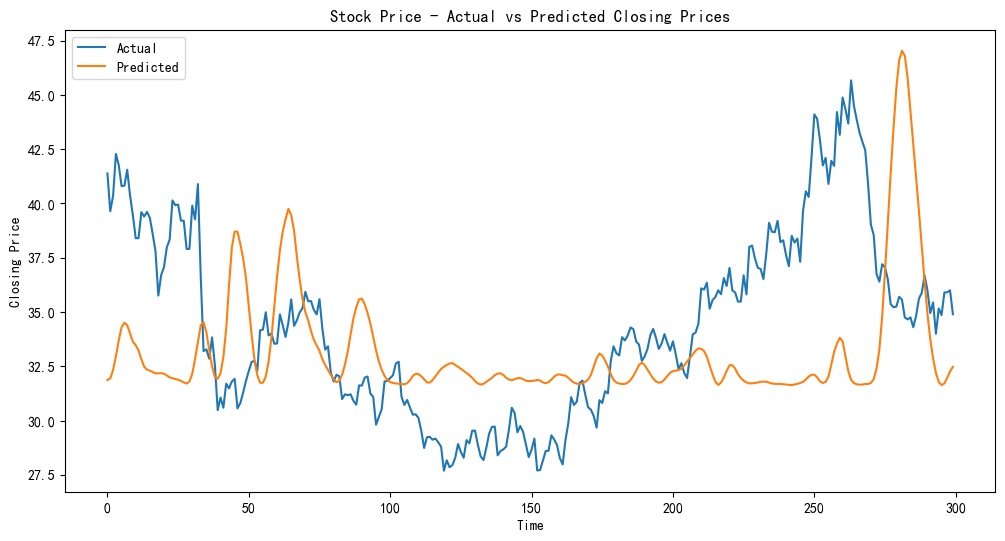

均方误差 (MSE):  25.83522439448434
均方根误差 (RMSE):  5.0828362549352635


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1500:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['MACD_Histogram']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## *MACD,MACD_Signal,MACD_Histogram

Epoch 1/50
38/38 [==============================] - 4s 9ms/step - loss: 0.0702
Epoch 2/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0540
Epoch 3/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0538
Epoch 4/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0532
Epoch 5/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0532
Epoch 6/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0529
Epoch 7/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0519
Epoch 8/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0512
Epoch 9/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0498
Epoch 10/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0504
Epoch 11/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0494
Epoch 12/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0495
Epoch 13/50
38/38 [==============================

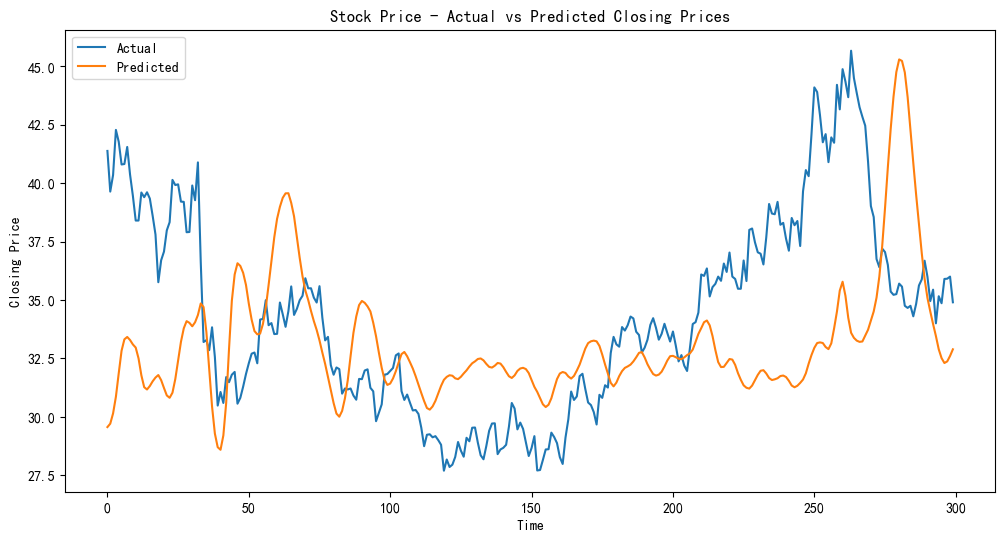

均方误差 (MSE):  22.87516542412994
均方根误差 (RMSE):  4.782798911111562


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1500:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['MACD','MACD_Signal','MACD_Histogram']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## RSI预测

Epoch 1/50
38/38 [==============================] - 4s 9ms/step - loss: 0.0748
Epoch 2/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0576
Epoch 3/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0550
Epoch 4/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0545
Epoch 5/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0546
Epoch 6/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0547
Epoch 7/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0548
Epoch 8/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0540
Epoch 9/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0546
Epoch 10/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0537
Epoch 11/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0548
Epoch 12/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0544
Epoch 13/50
38/38 [==============================

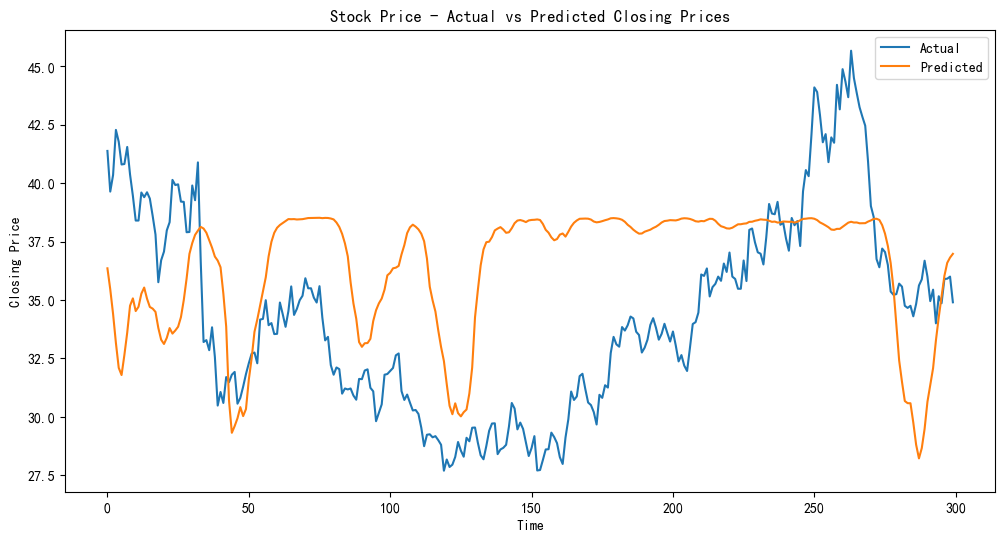

均方误差 (MSE):  26.600536274715452
均方根误差 (RMSE):  5.157570772632737


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1500:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['RSI']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## **volume

Epoch 1/50
50/50 [==============================] - 4s 9ms/step - loss: 0.0699
Epoch 2/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0538
Epoch 3/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0527
Epoch 4/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0530
Epoch 5/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0529
Epoch 6/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0516
Epoch 7/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0499
Epoch 8/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0444
Epoch 9/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0444
Epoch 10/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0437
Epoch 11/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0438
Epoch 12/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0443
Epoch 13/50
50/50 [==============================

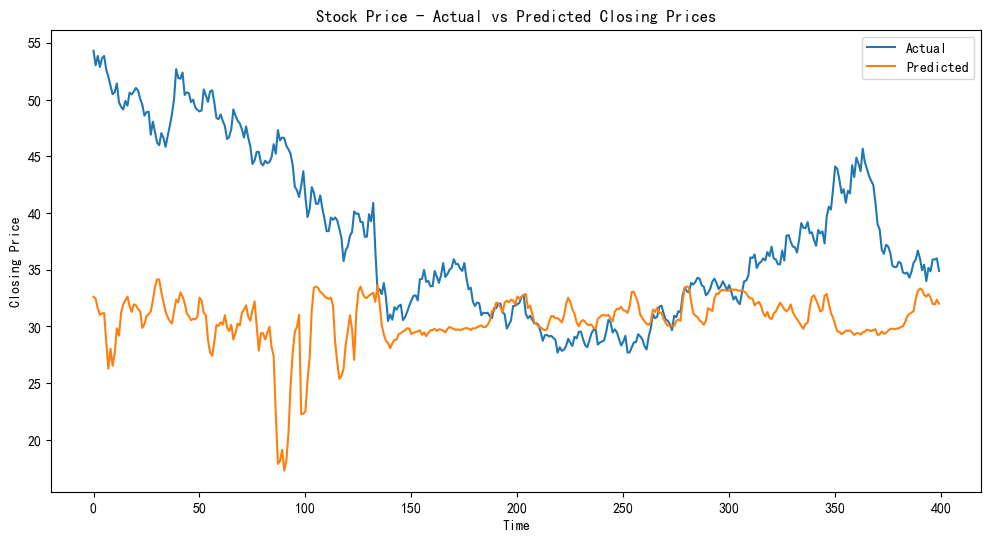

均方误差 (MSE):  116.54303664347222
均方根误差 (RMSE):  10.795510022387651


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-2000:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['volume']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## high,low,volume,RSI

Epoch 1/50
25/25 [==============================] - 4s 10ms/step - loss: 0.0350
Epoch 2/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 3/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 4/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 7/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 8/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 9/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 10/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 11/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 12/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 13/50
25/25 [=============================

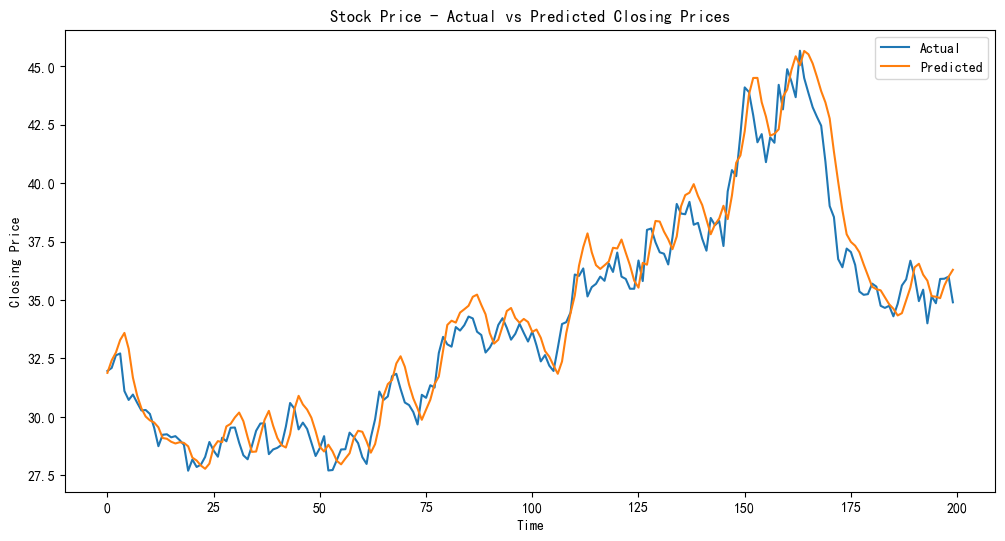

均方误差 (MSE):  1.140643410025796
均方根误差 (RMSE):  1.06800908705207


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1000:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['high','low','volume','RSI']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## 涨幅 预测

Epoch 1/50
25/25 [==============================] - 4s 11ms/step - loss: 0.0902
Epoch 2/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0690
Epoch 3/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0680
Epoch 4/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0685
Epoch 5/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0676
Epoch 6/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0677
Epoch 7/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0678
Epoch 8/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0676
Epoch 9/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0678
Epoch 10/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0675
Epoch 11/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0676
Epoch 12/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0674
Epoch 13/50
25/25 [==================

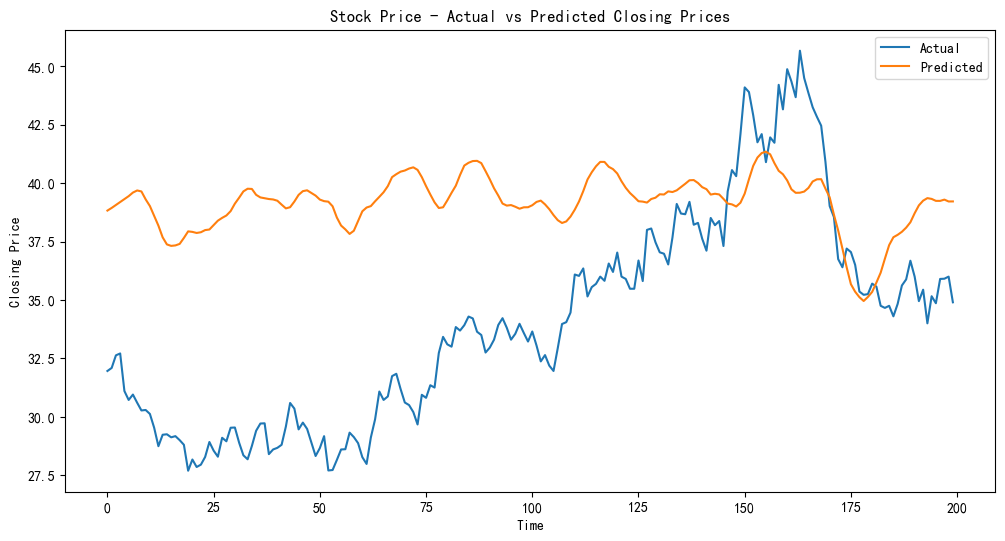

均方误差 (MSE):  45.267459721372354
均方根误差 (RMSE):  6.728109669243833


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1000:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['涨幅']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## *volume,RSI 预测

Epoch 1/50
25/25 [==============================] - 4s 11ms/step - loss: 0.0922
Epoch 2/50
25/25 [==============================] - 0s 11ms/step - loss: 0.0648
Epoch 3/50
25/25 [==============================] - 0s 11ms/step - loss: 0.0586
Epoch 4/50
25/25 [==============================] - 0s 11ms/step - loss: 0.0551
Epoch 5/50
25/25 [==============================] - 0s 11ms/step - loss: 0.0565
Epoch 6/50
25/25 [==============================] - 0s 11ms/step - loss: 0.0541
Epoch 7/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0544
Epoch 8/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0525
Epoch 9/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0530
Epoch 10/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0526
Epoch 11/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0519
Epoch 12/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0527
Epoch 13/50
25/25 [==================

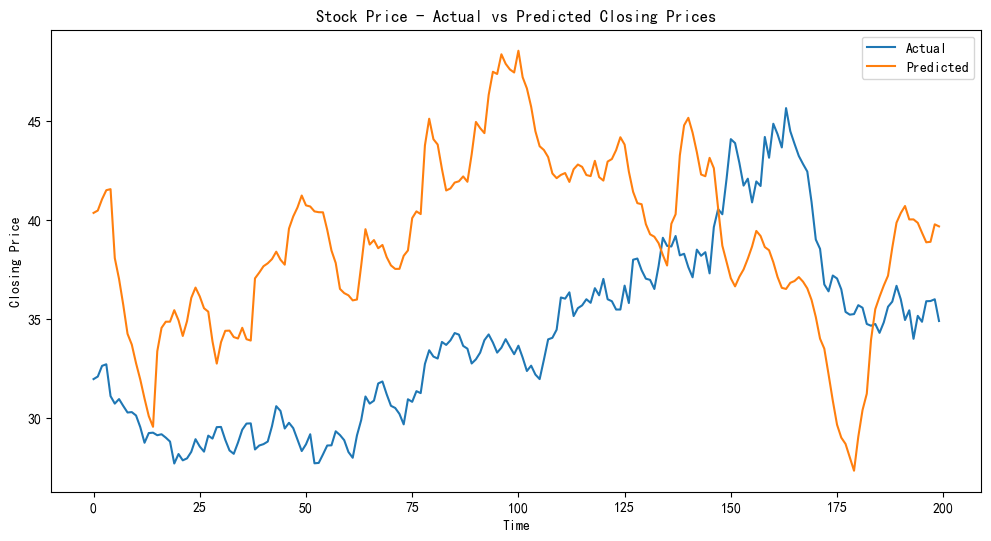

均方误差 (MSE):  57.54426979458571
均方根误差 (RMSE):  7.585793946225122


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1000:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['volume','RSI']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## volume，MACD_Histogram

Epoch 1/50
50/50 [==============================] - 4s 11ms/step - loss: 0.0636
Epoch 2/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0546
Epoch 3/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0537
Epoch 4/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0530
Epoch 5/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0531
Epoch 6/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0488
Epoch 7/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0448
Epoch 8/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0442
Epoch 9/50
50/50 [==============================] - 1s 10ms/step - loss: 0.0439
Epoch 10/50
50/50 [==============================] - 1s 10ms/step - loss: 0.0438
Epoch 11/50
50/50 [==============================] - 1s 10ms/step - loss: 0.0437
Epoch 12/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0439
Epoch 13/50
50/50 [==================

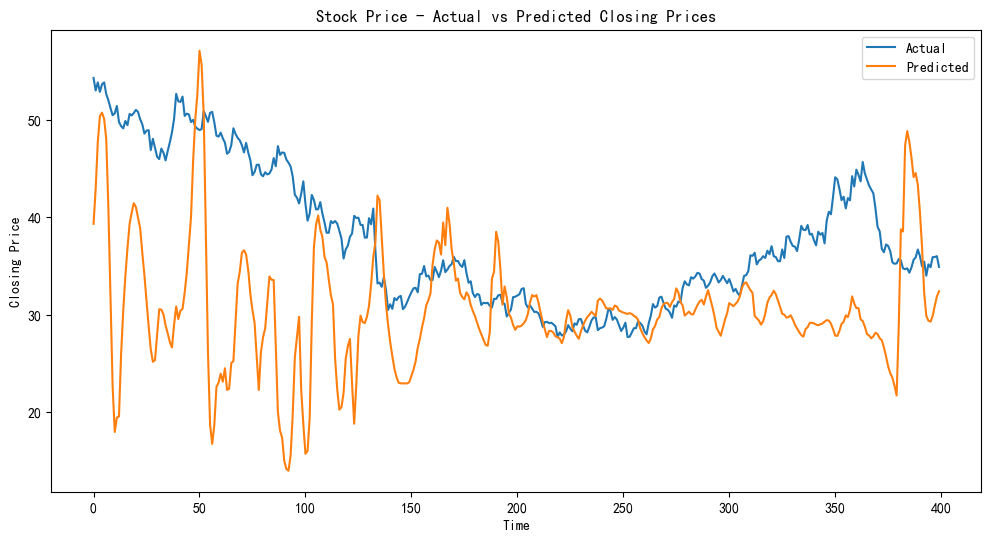

均方误差 (MSE):  134.61057021724247
均方根误差 (RMSE):  11.602179545983697


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-2000:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['volume','MACD_Histogram']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)